# Reconstructed cell neurite lengths
Plotting both (1) path length distances to the leaves of the skeletons and (2) the dendritic lengths reconstructed as a percentage of the expected value.

In [1]:
import numpy as np
import pandas as pd
import random
from scipy import stats

from matplotlib import rcParams as rc
from matplotlib import pyplot as plt

from lib import plot, u

In [2]:
rc.update({'font.size': 20})

## Reading data

In [3]:
pyr_leaves_raw = pd.read_csv('data/pyr_dist_to_leaves.csv', index_col=0)
inh_leaves = pd.read_csv('data/inh_dist_to_leaves.csv', index_col=0)

In [4]:
pyr_complengths_raw = pd.read_csv('data/pyr_compartment_lengths.csv', index_col=0)

In [5]:
pyrs_clean_compartments = u.read_ids("data/pyc_analysis_ids.csv")

In [6]:
len(pyrs_clean_compartments)

351

In [7]:
pyr_leaves = pyr_leaves_raw[pyr_leaves_raw.pt_root_id.isin(pyrs_clean_compartments)]
pyr_complengths = pyr_complengths_raw[
    pyr_complengths_raw.cellid.isin(pyrs_clean_compartments)].copy()

In [8]:
pyr_leaves.head()

,cell_type,pt_position,pt_root_id,axon_lengths_um,apical_dend_lengths_um,basal_dend_lengths_um,ambiguous_dend_lengths_um
0,e,[41760 60256 1702],648518346349538237,[19.448887701766967],[],"[37.40225366783619, 31.243814471485425, 84.285...",[]
1,e,[98128 39856 218],648518346349536816,"[306.0687971569155, 245.68357328657453, 190.39...",[],"[103.4173976932205, 72.44050180872925, 43.9871...",[]
2,e,[51248 50608 86],648518346349539797,[91.70499782529022],[],"[57.93645816384551, 97.03536943005167, 106.918...",[16.478488729480926]
3,e,[104928 72496 1448],648518346349536851,[10.316504071754204],"[162.27204926250639, 181.4228587866495, 182.79...","[129.73751322728427, 94.54452374472748, 51.860...",[]
4,e,[58128 35616 2059],648518346349522862,[],[],"[91.0414137101149, 102.72404124609558]",[]


In [9]:
inh_leaves.head()

,cell_type,pt_position,pt_root_id,axon_lengths_um,dendrite_lengths_um,cell_subtype
0,i,[86768 55856 1230],648518346349528994,"[261.65309749276224, 258.4801296853987, 295.50...","[42.31827488625724, 73.69974670903073, 103.816...",basket
1,i,[104432 58272 821],648518346349489861,[50.789981481195696],"[122.86438628850311, 80.88754725911664, 80.590...",bipolar
2,i,[99984 54144 2124],648518346349522740,[],"[193.02834511189195, 186.73636736860374, 94.99...",unknown_type
3,i,[72384 51808 889],648518346349538285,"[170.4840290226951, 125.36081407085878, 101.32...","[153.8435688301389, 115.4814931272232, 105.706...",bipolar
4,i,[73584 60096 990],648518346349487752,[41.10914797728458],"[61.85844933732447, 51.70699369574795, 53.2648...",bipolar


In [10]:
inh_leaves[inh_leaves.cell_subtype == "unknown_type"]

,cell_type,pt_position,pt_root_id,axon_lengths_um,dendrite_lengths_um,cell_subtype
2,i,[99984 54144 2124],648518346349522740,[],"[193.02834511189195, 186.73636736860374, 94.99...",unknown_type
5,i,[79008 47600 63],648518346349493894,[],"[94.61845997839274, 42.809173736539485, 39.222...",unknown_type
8,i,[104752 74976 238],648518346349489985,[],[25.987765876782145],unknown_type
9,i,[57680 38672 2131],648518346349531994,[],"[85.45337966419129, 126.92963694718932]",unknown_type
10,i,[85920 70832 683],648518346349517783,[],"[130.46691528070178, 118.53170862988178, 48.46...",unknown_type
14,i,[105440 63712 635],648518346349488919,[],"[110.28119742765578, 91.6506632993427, 54.9663...",unknown_type
18,i,[115536 42992 1870],648518346349538370,[],"[178.15886552992276, 156.36157123256072, 89.60...",unknown_type
19,i,[113296 51456 1917],648518346349525188,"[327.5897165365468, 229.66647860901398, 264.17...","[132.41866400592826, 37.07376417076622, 20.334...",unknown_type
24,i,[104320 45056 1863],648518346349522750,[],"[47.221931112994994, 29.959858623647293, 60.68...",unknown_type
26,i,[70096 48288 307],648518346349515985,[],"[61.733846389329976, 95.7170405130041, 73.7140...",unknown_type


In [11]:
pyr_complengths.head()

,cellid,soma_length_um,axon_length_um,basal_length_um,apical_length_um,ambiguous dendrite_length_um,ambiguous_length_um
0,648518346349538237,103.055461,19.314906,618.975409,0.000000,0.000000,0.0
1,648518346349536816,84.838346,1411.959030,720.716621,0.000000,0.000000,0.0
2,648518346349539797,76.623395,91.620212,592.283655,0.000000,16.307809,0.0
3,648518346349536851,110.028568,10.186407,654.505576,882.454699,0.000000,0.0
4,648518346349522862,15.172329,0.000000,192.604653,0.000000,0.000000,0.0


## Formatting data

In [12]:
def length_frame(df, lengthcol, celltype, neuritetype):
    cellids, lengths, celltypes, neuritetypes = [], [], [], []
    
    for (cellid, lens) in zip(df["pt_root_id"], df[lengthcol]):
        for length in eval(lens):
            cellids.append(cellid)
            lengths.append(length)
            celltypes.append(celltype)
            neuritetypes.append(neuritetype)
    
    data_dict = {
        "cellid": pd.Series(cellids, dtype="int"),
        "neuritelength": lengths,
        "celltype": celltypes,
        "neuritetype": neuritetypes
    }

    return pd.DataFrame(data_dict)


def assemble_pyr_data(df):
    axondf = length_frame(df, "axon_lengths_um", "pyramidal", "axon")
    basaldf = length_frame(df, "basal_dend_lengths_um", "pyramidal", "basal")
    apicaldf = length_frame(df, "apical_dend_lengths_um", "pyramidal", "apical")
    
    return pd.concat((axondf, basaldf, apicaldf), ignore_index=True)


def assemble_inh_data(df):
    typedfs = []
    for (typename, subdf) in df.groupby("cell_subtype"):
        typedfs.append(assemble_typedf(subdf, typename))
    
    return pd.concat(typedfs, ignore_index=True)


def assemble_typedf(df, celltype):
    neuritedfs = []
    axondf = length_frame(df, "axon_lengths_um", celltype, "axon")
    denddf = length_frame(df, "dendrite_lengths_um", celltype, "dendrite")
    
    return pd.concat((axondf, denddf), ignore_index=True)


def assemble_all_data():
    pyrdf = assemble_pyr_data(pyr_leaves)
    inhdf = assemble_inh_data(inh_leaves)
    
    return pd.concat((pyrdf, inhdf), ignore_index=True)

In [13]:
leafdata = assemble_all_data()

In [14]:
leafdata.head()

,cellid,neuritelength,celltype,neuritetype
0,648518346349538237,19.448888,pyramidal,axon
1,648518346349536816,306.068797,pyramidal,axon
2,648518346349536816,245.683573,pyramidal,axon
3,648518346349536816,190.394086,pyramidal,axon
4,648518346349536816,169.929496,pyramidal,axon


In [15]:
maxima = leafdata.groupby(["cellid", "neuritetype"])["neuritelength"].max().reset_index()

In [16]:
maxima[(maxima.neuritetype == "axon") &
       (maxima.neuritelength > 100)]

,cellid,neuritetype,neuritelength
0,648518346349477331,axon,404.138730
16,648518346349492682,axon,243.631400
32,648518346349515986,axon,312.926936
34,648518346349516051,axon,192.718596
41,648518346349519354,axon,282.996115
...,...,...,...
886,648518346349539886,axon,245.082303
892,648518346349539891,axon,125.430518
914,648518346349540017,axon,345.832103
916,648518346349540048,axon,255.916178


In [17]:
len(set(leafdata.cellid[leafdata.celltype == "pyramidal"]))

351

In [18]:
len(set(leafdata.cellid))

385

In [19]:
leafdata.loc[leafdata.celltype == "unknown_type", "celltype"] = "unclassified"

In [20]:
plotdf = leafdata.groupby(["cellid", "celltype", "neuritetype"])["neuritelength"].\
    quantile([0.05, 0.5, 0.95]).unstack().reset_index()

In [21]:
plotdf.head()

,cellid,celltype,neuritetype,0.05,0.5,0.95
0,648518346349477331,bipolar,axon,66.320367,182.381953,321.115928
1,648518346349477331,bipolar,dendrite,14.907629,41.191849,115.981463
2,648518346349487432,bipolar,dendrite,5.608375,50.099377,106.246134
3,648518346349487752,bipolar,axon,41.109148,41.109148,41.109148
4,648518346349487752,bipolar,dendrite,14.267682,59.603715,134.409277


In [22]:
plotdf["celltype"] = [c.capitalize() for c in plotdf.celltype]

## Plotting

#### Distances to leaves (neurite length from soma)

In [23]:
def _errorbar_w_jitter(xs, ys, errslow, errshi,
                      jitter=0.2, seed=None, **kwargs):
    if seed is not None:
        np.random.seed(seed)

    xs = xs + stats.uniform(-jitter, 2*jitter).rvs(len(xs))
    low = ys - errslow
    hi = errshi - ys
    
    plt.errorbar(xs, ys, yerr=[low, hi],
                 marker='', linestyle='', color="tab:gray")
    plt.scatter(xs, ys, marker='o', s=20, color='k', zorder=10)
    

def errorbar_w_jitter(df, levels, levelcolname="celltype",
                      seed=None, level_xs=None):
    df = df[df[levelcolname].isin(levels)]
    
    if level_xs is None:
        level_xs = list(range(len(levels)))

    levelmap = {level: x for (level, x) in zip(levels, level_xs)}
    xs = [levelmap[v] for v in df[levelcolname]]
    
    _errorbar_w_jitter(xs, df[0.5], df[0.05], df[0.95], seed=seed)
    
    plt.xticks(level_xs, levels, rotation=45)

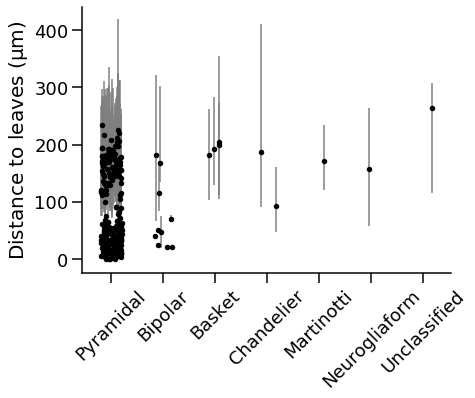

In [24]:
plt.figure(figsize=(7, 6))
levels = ["Pyramidal", "Bipolar", "Basket",
          "Chandelier", "Martinotti",
          "Neurogliaform", "Unclassified"]

errorbar_w_jitter(plotdf[plotdf.neuritetype == "axon"], levels,
                  level_xs = [0, 1, 2, 3, 4, 5, 6], seed=67234697)
plt.ylabel("Distance to leaves ($\mathrm{\mu}$m)")

plt.tight_layout()
plot.format_axes()
plt.savefig("__axonlength.svg")
plt.show()

In [25]:
denddf = plotdf[plotdf.neuritetype != "axon"].copy()

full_neuritetype = []
for (celltype, neuritetype) in zip(denddf.celltype, denddf.neuritetype):
    if celltype != "Pyramidal":
        full_neuritetype.append(celltype)
    else:
        full_neuritetype.append(f"{celltype}\n{neuritetype}")

denddf.loc[:, "full_celltype"] = full_neuritetype

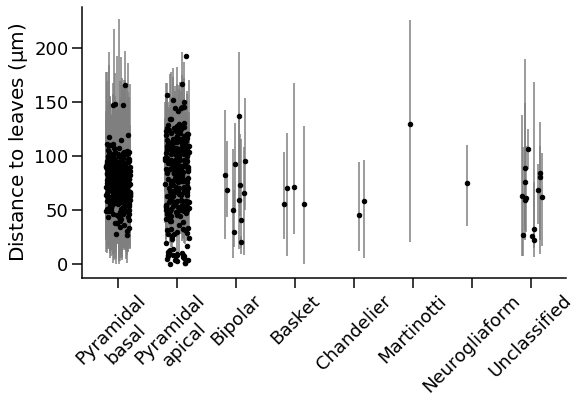

In [26]:
plt.figure(figsize=(8.5, 6))
levels = ["Pyramidal\nbasal", "Pyramidal\napical",
          "Bipolar", "Basket", "Chandelier", "Martinotti",
          "Neurogliaform", "Unclassified"]

errorbar_w_jitter(denddf, levels, levelcolname="full_celltype", seed=7869876)
plt.ylabel("Distance to leaves ($\mathrm{\mu}$m)")

plot.format_axes()
plt.tight_layout()
plt.savefig("assets/dendritelength.png")
plt.savefig("__dendritelength.svg")
plt.show()

### Percentage completion

In [27]:
pyr_complengths.head()

,cellid,soma_length_um,axon_length_um,basal_length_um,apical_length_um,ambiguous dendrite_length_um,ambiguous_length_um
0,648518346349538237,103.055461,19.314906,618.975409,0.000000,0.000000,0.0
1,648518346349536816,84.838346,1411.959030,720.716621,0.000000,0.000000,0.0
2,648518346349539797,76.623395,91.620212,592.283655,0.000000,16.307809,0.0
3,648518346349536851,110.028568,10.186407,654.505576,882.454699,0.000000,0.0
4,648518346349522862,15.172329,0.000000,192.604653,0.000000,0.000000,0.0


In [28]:
pyr_complengths["dend_length_um"] = (
    pyr_complengths["apical_length_um"] +
    pyr_complengths["ambiguous dendrite_length_um"] +
    pyr_complengths["basal_length_um"])

In [29]:
def plotpathlengthhist(data, upperbnd, binspacing=500,
                       tickspacing=1000, intlabels=True):
    numbins = int(np.ceil(upperbnd / binspacing)) + 1
    bins = np.arange(numbins) * binspacing
    plt.hist(data, color='k', edgecolor='k', bins=bins)

    numticks = int(np.ceil(upperbnd / tickspacing))
    ticks = np.arange(numticks) * tickspacing
    ticklabels = np.arange(numticks) * tickspacing / 1000.
    if intlabels:
        ticklabels = ticklabels.astype("int")

    plt.xticks(ticks, ticklabels, fontsize=25, fontname="Helvetica")
    plt.yticks(fontsize=25, fontname="Helvetica")
    plt.xlim(0, upperbnd)

Average path lengths from [Gilman, Medalla & Luebke 2017](https://doi.org/10.1093/cercor/bhw062):  

* Dendrite arbor - 4.291mm  
* Basal arbor - 2.583mm
* Apical arbor - 1.707mm

In [30]:
# format string for matplotlib
MU = "$\mathrm{\mu}$"

In [31]:
pyr_complengths.dend_length_um.max()

2980.09183066378

1475.4211892709839
1117.5910214584592
309.66567750987934


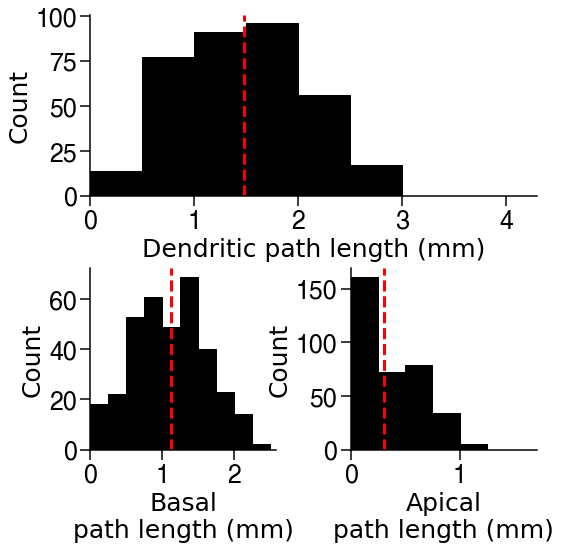

In [32]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
# Histogram
plotpathlengthhist(pyr_complengths.dend_length_um, 4291, binspacing=500)
# Line at median
median = np.percentile(pyr_complengths.dend_length_um, 50)
plt.axvline(median, ls='--', lw=3, color='r')

plt.xlabel(f"Dendritic path length (mm)", fontsize=plot.AXIS_FONTSIZE)
plt.ylabel("Count", fontsize=plot.AXIS_FONTSIZE)
print(median)
plot.format_axes()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.subplot(2, 2, 3)
# Histogram
plotpathlengthhist(pyr_complengths.basal_length_um, 2583, 250)
# Line at median
median = np.percentile(pyr_complengths.basal_length_um, 50)
plt.axvline(median, ls='--', lw=3, color='r')

plt.xlabel(f"Basal\npath length (mm)", fontsize=plot.AXIS_FONTSIZE)
plt.ylabel("Count", fontsize=plot.AXIS_FONTSIZE)
print(median)
plot.format_axes()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.subplot(2, 2, 4)
# Histogram
plotpathlengthhist(pyr_complengths.apical_length_um, 1707, 250)
# Line at median
median = np.percentile(pyr_complengths.apical_length_um, 50)
plt.axvline(median, ls='--', lw=3, color='r')

plt.xlabel(f"Apical\npath length (mm)", fontsize=plot.AXIS_FONTSIZE)
plt.ylabel("Count", fontsize=plot.AXIS_FONTSIZE)
print(median)
plot.format_axes()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig("__dendpathlength.svg")
plt.show()